# Objectifs

- Organisation du code avec de la POO (programmation orientée objet).
- Prise en main de la librairie `scikit learn`.
- On reste sur de la régression polynomiale.
- Observation Biais/Variance.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

# Fonction recherchée

In [3]:
def fonction(x):
    return 1./(0.1+x)-5./(0.5+x)

In [5]:
def affichage_fonction(ax):
    x = np.linspace(0, 10, 1000)
    y = fonction(x)

    ax.plot(x,y, label="fonction recherchée")

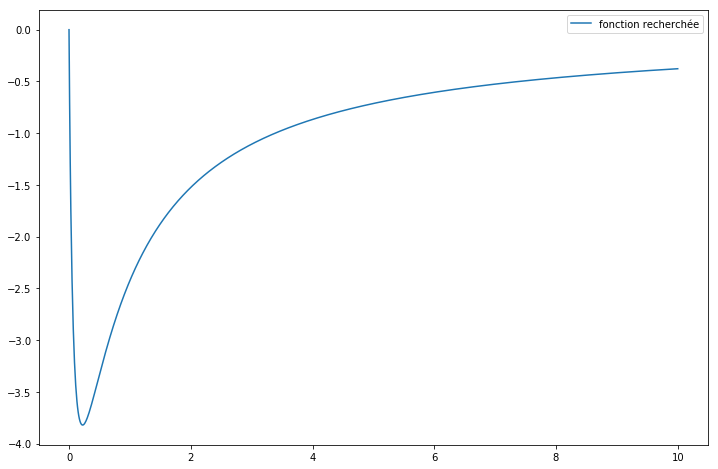

In [7]:
fig, ax = plt.subplots()
affichage_fonction(ax)
ax.legend();

# Génération des données

In [8]:
rng = np.random.RandomState(10)

In [44]:
class Echantillon:
    def __init__(self, nb, sigma):
        self.nb = nb
        self.sigma = sigma
        self.points = 10*rng.rand(nb)
        self.valeurs = fonction(self.points)
        self.observations = self.valeurs + sigma*rng.randn(nb)

    def affichage(self, ax):
        ax.scatter(self.points, self.observations, label="observations", color="red")
        
    def __repr__(self):
        return "Echantillon({}, {})".format(self.nb, self.sigma)
    
    def __len__(self):
        return self.nb
    
    def puissances(self, d):
        return np.stack([self.points**k for k in range(1, d+1)], axis=1)

In [27]:
s = Echantillon(50, 0.5)
print(s)
print(len(s))

Echantillon(50, 0.5)
50


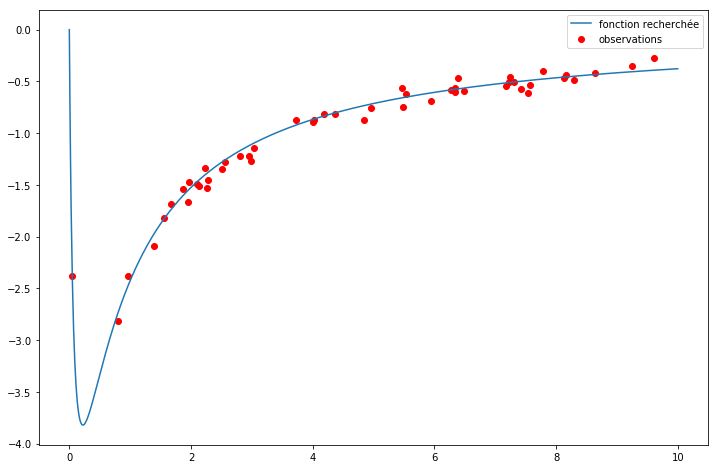

In [21]:
fig, ax = plt.subplots()
affichage_fonction(ax)
s = Echantillon(50, 0.1)
s.affichage(ax)
ax.legend();

# Apprentissage

In [28]:
from sklearn.linear_model import LinearRegression 

In [45]:
s = Echantillon(50, 0.1)

In [65]:
class Polyreg:
    def __init__(self, deg, s):
        self.deg = deg
        self.s = s
        self.est = LinearRegression(normalize=True)
        self.est.fit(X=self.s.puissances(deg), y=self.s.observations)
        
    def __call__(self, x):
        return self.est.predict(X=np.stack([x**k for k in range(1, self.deg+1)], axis=1))
    
    def affichage(self, ax):
        x = np.linspace(self.s.points.min(), self.s.points.max(), 1000)
        y = self(x)
        ax.plot(x, y, label="d={}".format(self.deg))

In [66]:
def comparaison(degres, s):
    fig, axs = plt.subplots(nrows=len(degres), figsize=(12, 4*len(degres)))
    
    for d, ax in zip(degres, axs):
        est = Polyreg(d, s)
        affichage_fonction(ax)
        s.affichage(ax)
        est.affichage(ax)
        ax.legend()

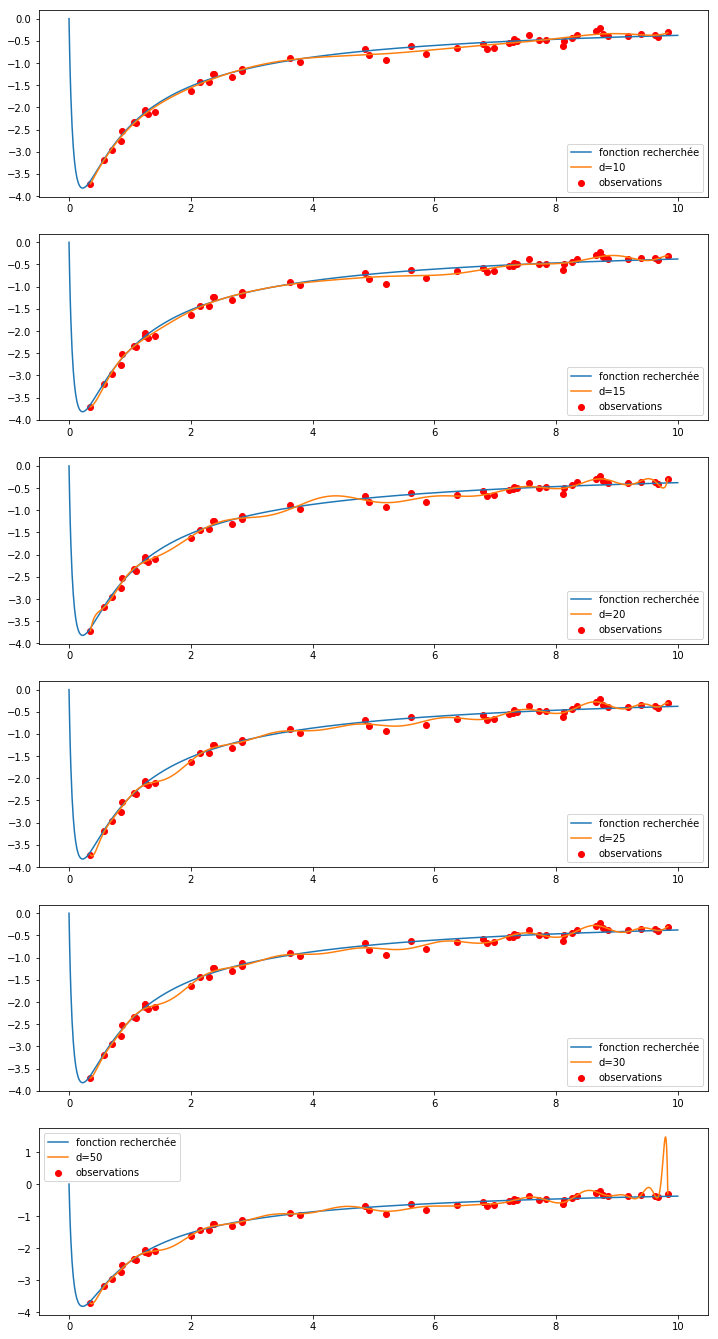

In [68]:
comparaison([10, 15, 20, 25, 30, 50], s)